In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

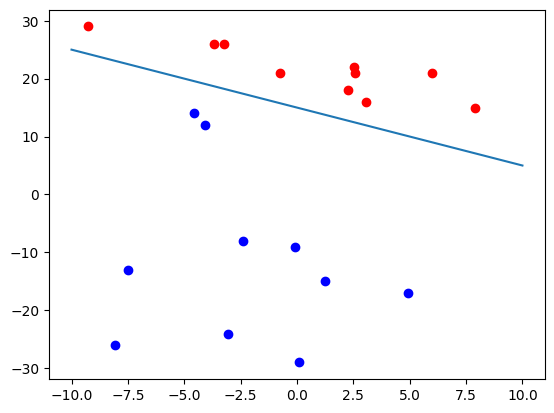

In [2]:
# Generating Linearly Separable Data.

def TargetFunction(x):
    return -x + 15

NumberOfDataPoints = 10

x1_red  = np.random.rand(NumberOfDataPoints)*20 - 10
x1_blue = np.random.rand(NumberOfDataPoints)*20 - 10
x2_red = np.zeros(len(x1_red))
x2_blue= np.zeros(len(x1_blue))

x = np.linspace(start=-10,stop=10, num=1000)

for i in range(NumberOfDataPoints):
    x2_red[i]    = np.random.randint(low = TargetFunction(x1_red[i])+3, high=30)
    x2_blue[i]   = np.random.randint(high = TargetFunction(x1_blue[i])-3, low=-30)

plt.scatter(x=x1_red, y=x2_red, color="red")
plt.scatter(x=x1_blue, y=x2_blue, color="blue")
plt.plot(x, TargetFunction(x))

In [3]:
# Preparing the Data Set
red_data    = np.dstack((x1_red, x2_red, np.ones_like(x1_red)))[0]
blue_data   = np.dstack((x1_blue, x2_blue, np.ones_like(x1_blue)))[0]

w = np.zeros(3)
w1 = np.zeros(3)
w2 = np.zeros(3)

def FirstMismatch(W):
    for i in red_data:
        if (np.inner(W,i) <= 0):
            return i, +1
    for i in blue_data:
        if (np.inner(W,i) > 0):
            return i,-1
    return None, None

print(red_data.shape, blue_data.shape)

(10, 3) (10, 3)


In [4]:
# Modified Perceptron Learning Algorithm
x, y = FirstMismatch(w)
x1, y1 = FirstMismatch(w1)
x2, y2 = FirstMismatch(w2)
count = 0

while x is not None and count < 2000:
    w += 0.1*(y-np.inner(w,x))*x
    x, y = FirstMismatch(w)
    count += 1
print(count, w)
count = 0
while x1 is not None and count < 2000:
    w1 += 0.01*(y1-np.inner(w1,x1))*x1
    x1, y1 = FirstMismatch(w)
    count += 1

print(count, w1)
count = 0
while x2 is not None and count < 2000:
    w2 += 0.001*(y2-np.inner(w2,x2))*x2
    x2, y2 = FirstMismatch(w2)
    count += 1

print(count, w2)
count = 0
print(count)

227 [inf inf inf]
1 [0.0226792 0.18      0.01     ]
748 [ 0.07539065  0.04665821 -0.30789933]
0


inf inf inf
inf inf inf
inf inf inf


/var/folders/88/wl5ftm6543l8qjh4j574vxv40000gn/T/ipykernel_812/1775461498.py:3: RuntimeWarning: invalid value encountered in divide
  return -((w0*x/w1) + (w2/w1))
/var/folders/88/wl5ftm6543l8qjh4j574vxv40000gn/T/ipykernel_812/1775461498.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return -((w0*x/w1) + (w2/w1))


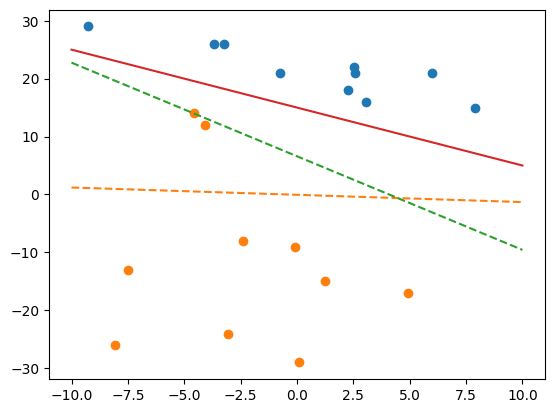

In [5]:
def NewLine(x, w0, w1, w2):
    print(w0, w1, w2)
    return -((w0*x/w1) + (w2/w1))

x = np.linspace(start=-10, stop=10, num=1000)

plt.scatter(x1_red, x2_red)
plt.scatter(x1_blue, x2_blue)
plt.plot(x, NewLine(x, w[0], w[1], w[2]), '--')
plt.plot(x, NewLine(x, w1[0], w1[1], w1[2]), '--')
plt.plot(x, NewLine(x, w2[0], w2[1], w2[2]), '--')
plt.plot(x, TargetFunction(x))